In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from distance_metrics import load_gower_matrix, euclidean_distance
from utils import compute_distance_and_plot,plot_distance

In [2]:
adult = pd.read_csv("../datasets/Adult.csv")
king = pd.read_csv("../datasets/king.csv")
fraud = pd.read_csv("../datasets/fraud.csv")

missing_values_fraud = ["prev_address_months_count", "current_address_months_count", "device_distinct_emails_8w"]
fraud[missing_values_fraud] = fraud[missing_values_fraud].replace(-1, np.nan)



Starting dataset:  Adult


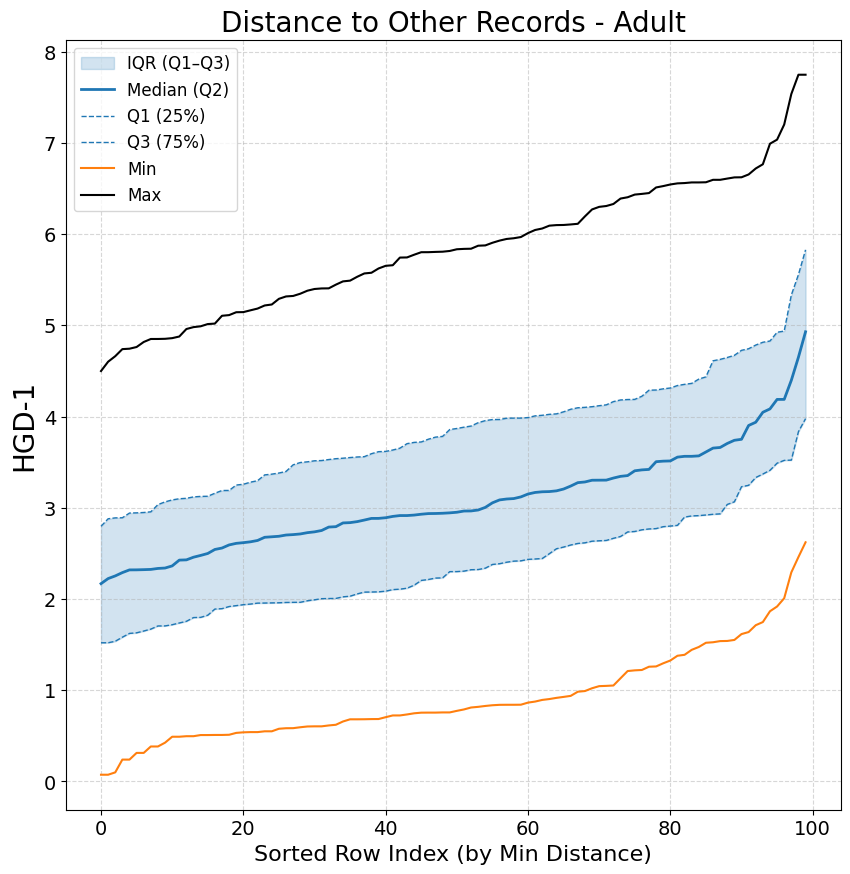

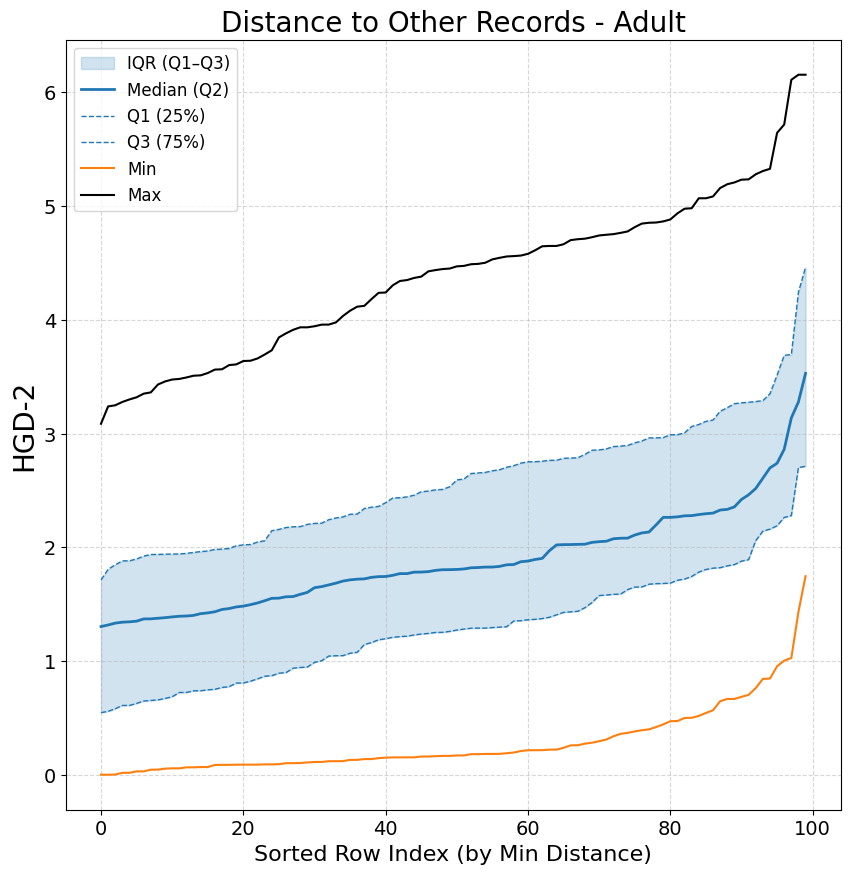

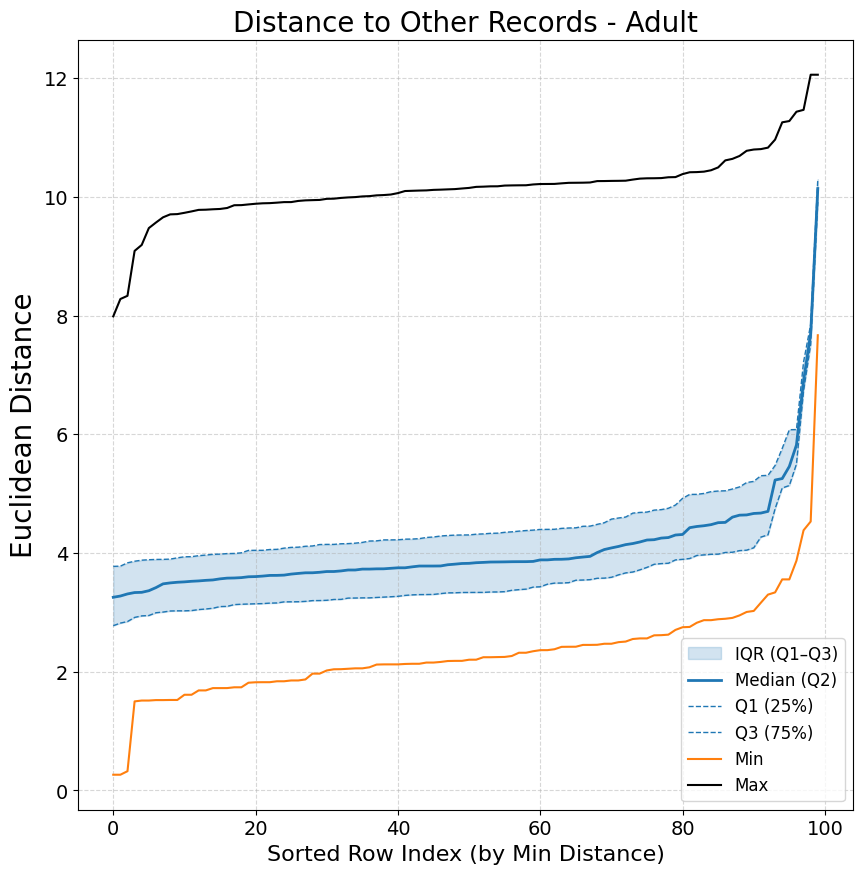

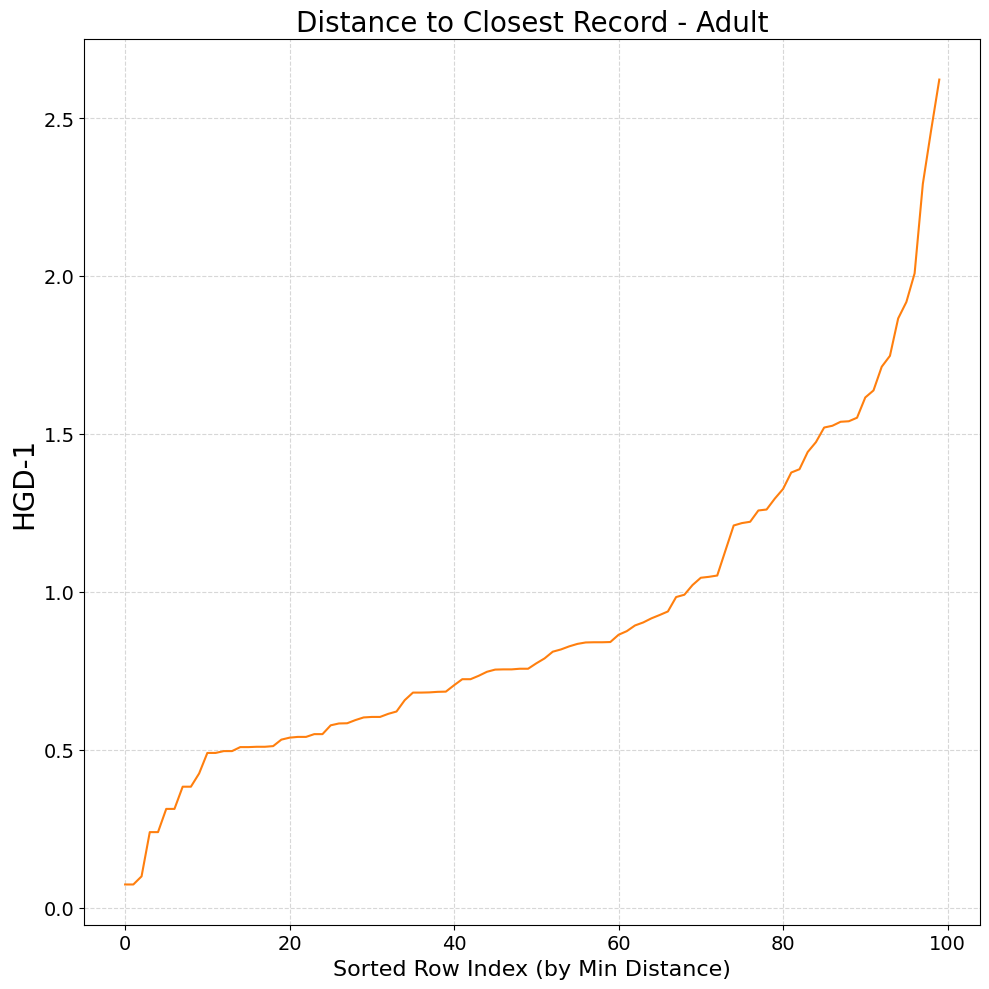

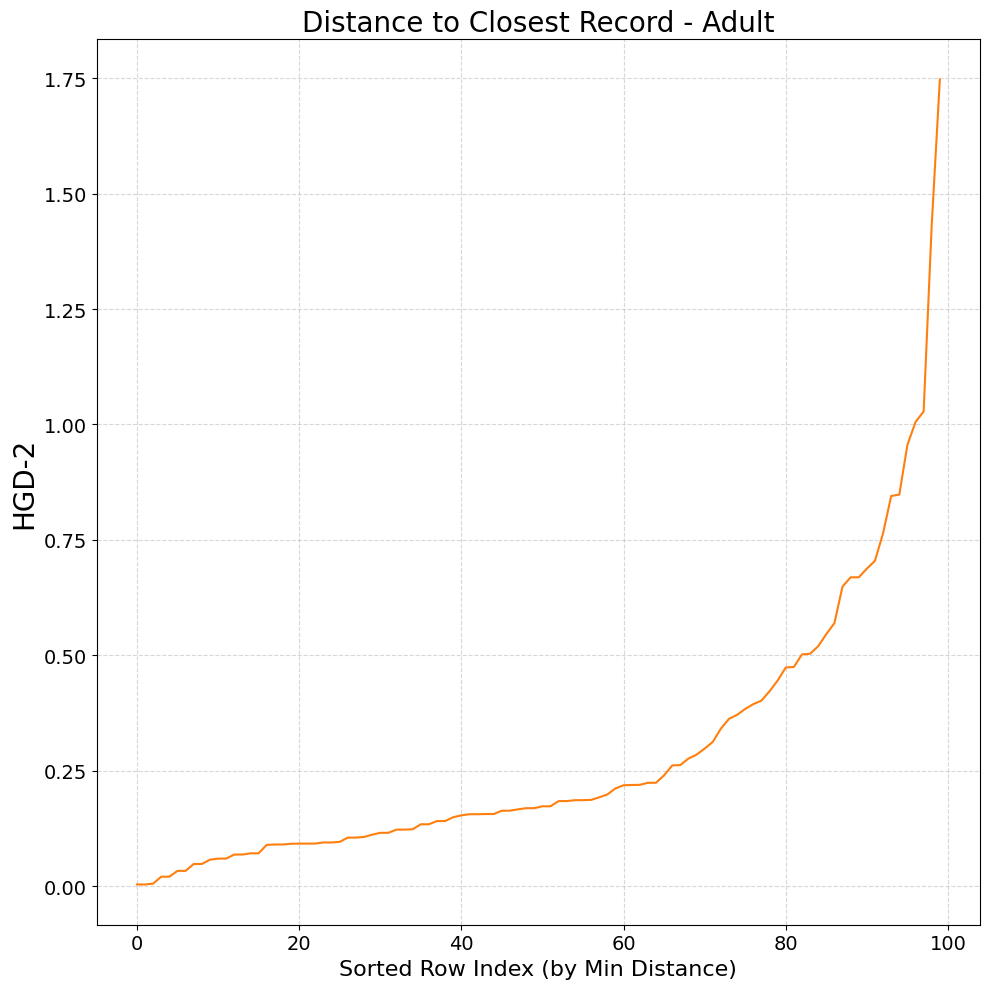

Starting dataset:  King


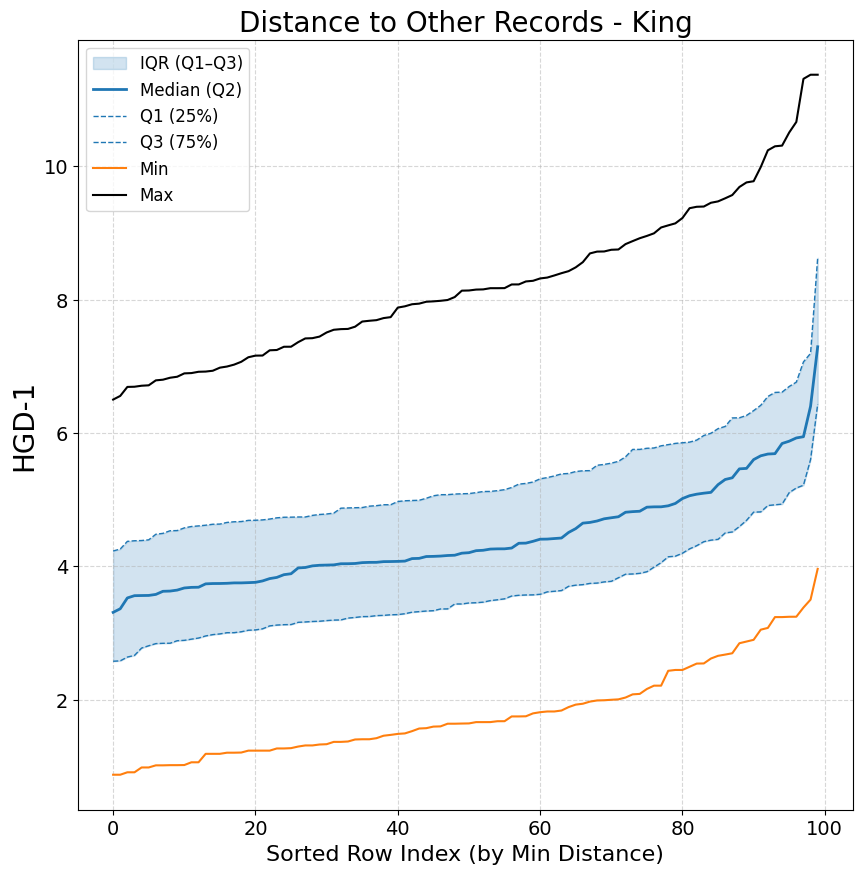

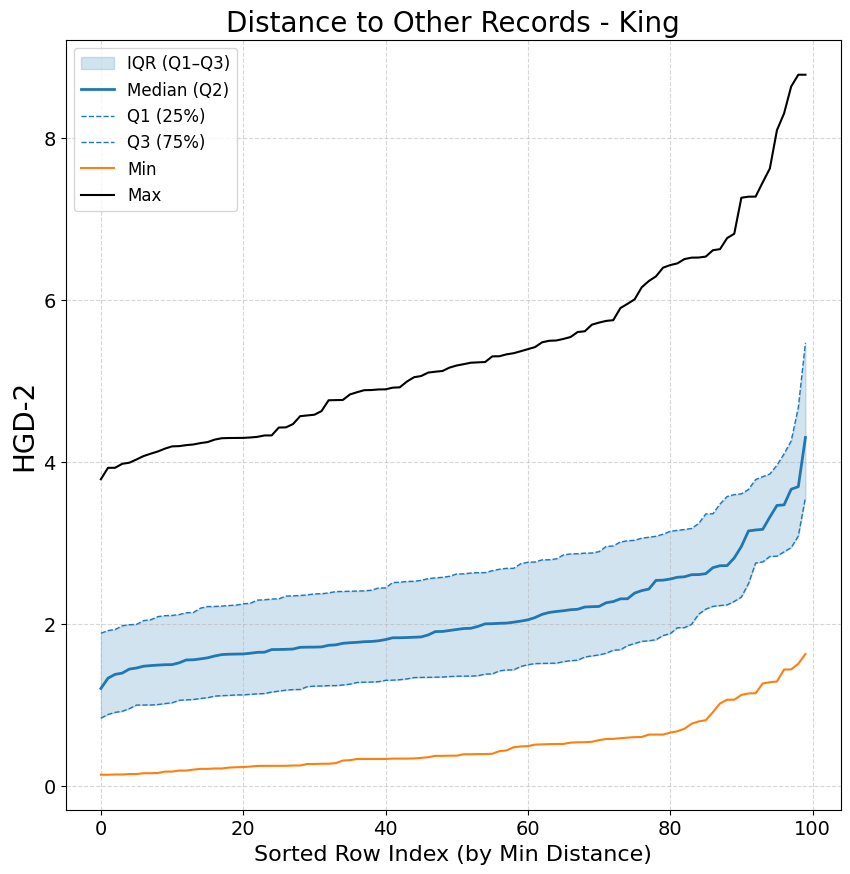

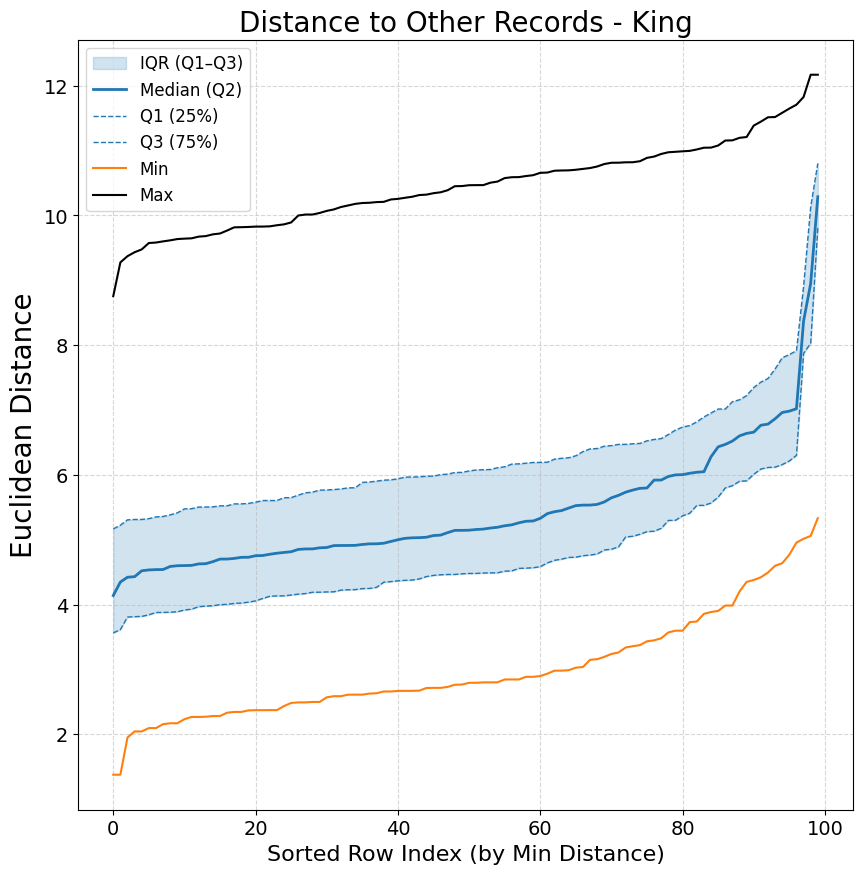

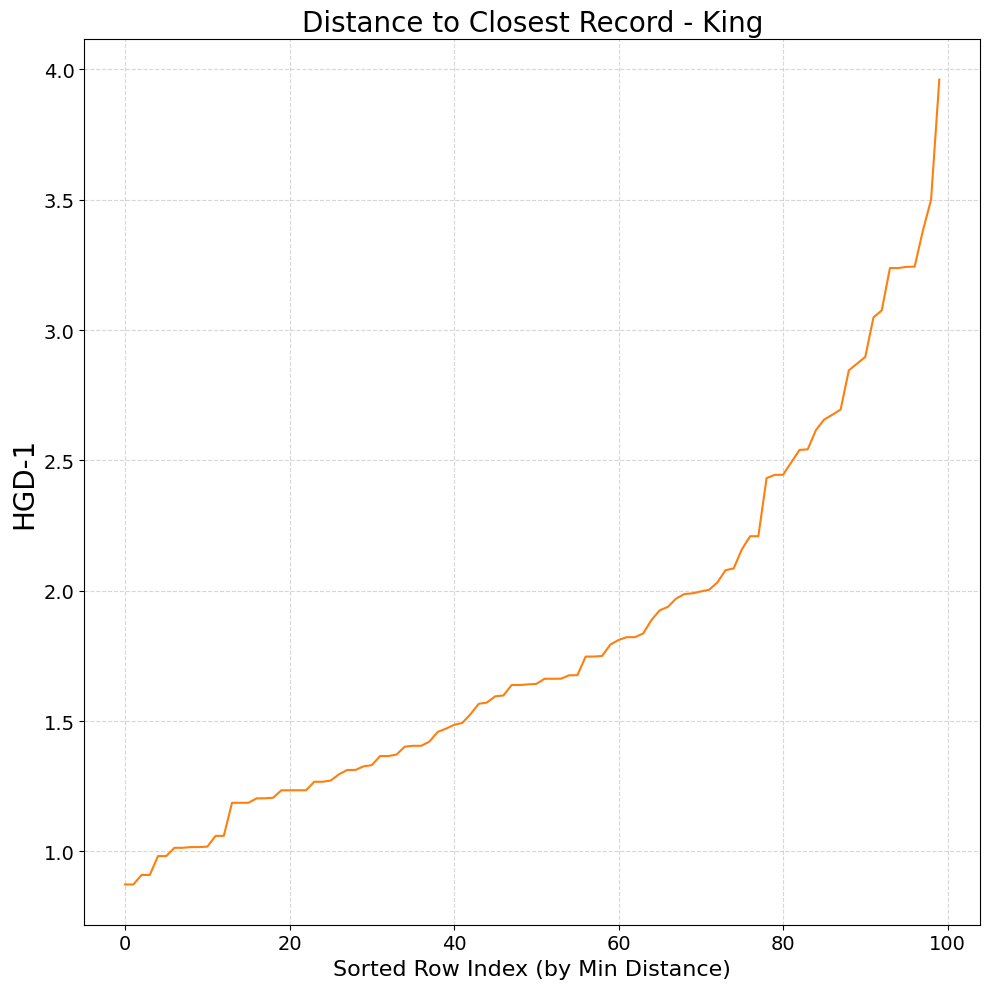

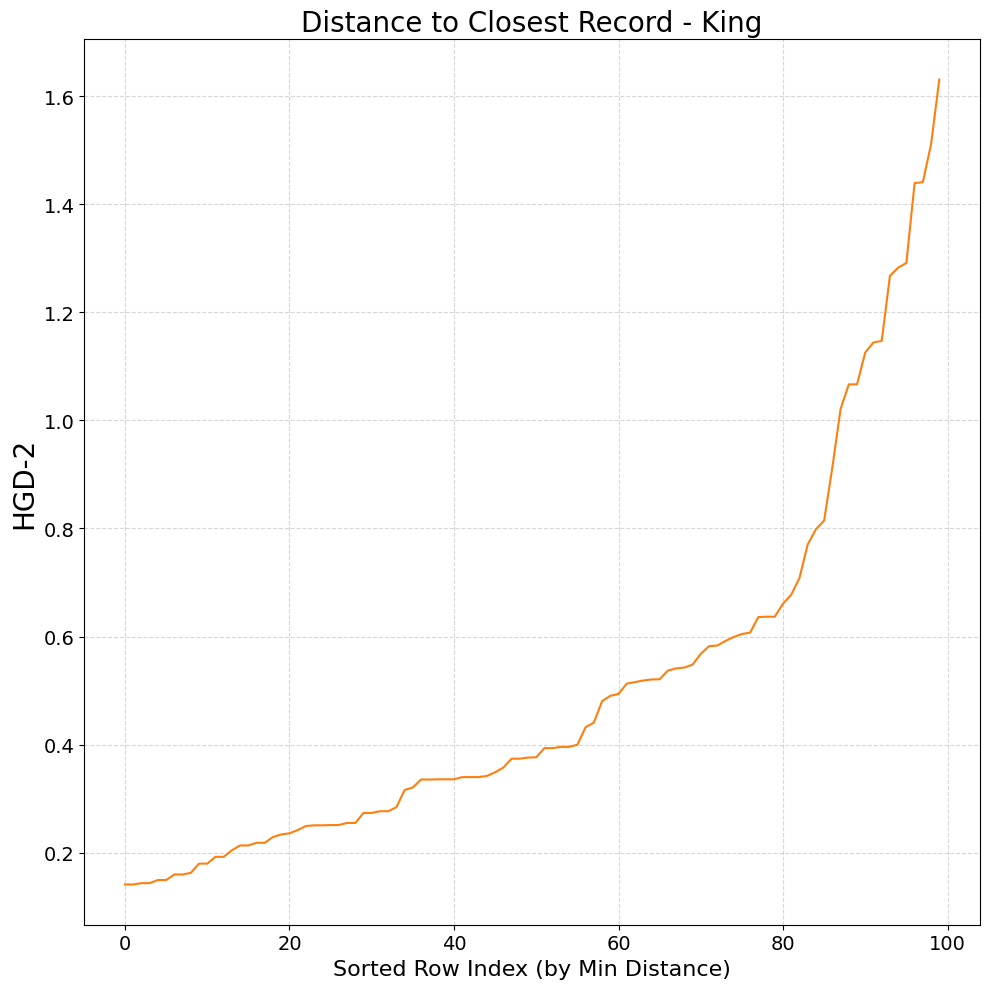

Starting dataset:  Fraud


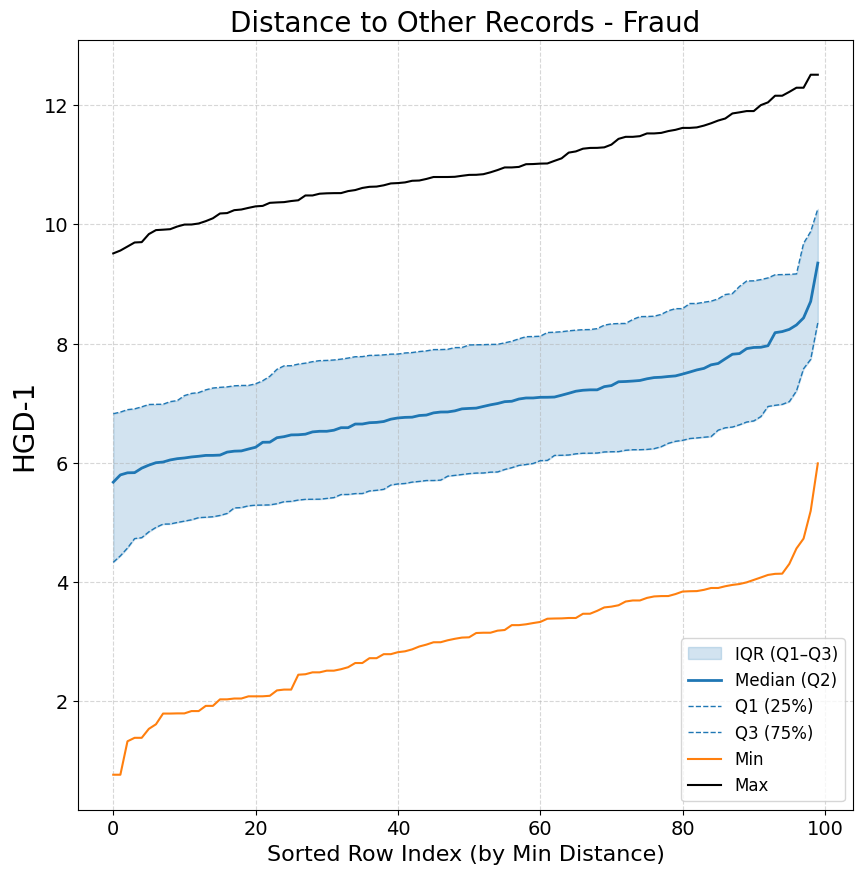

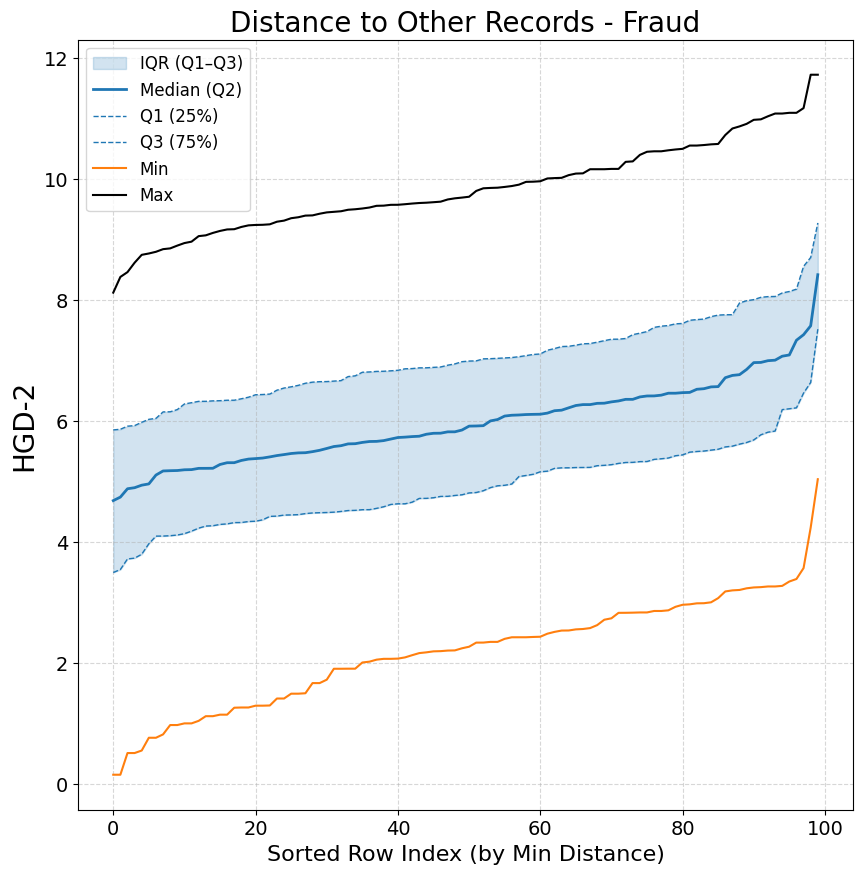

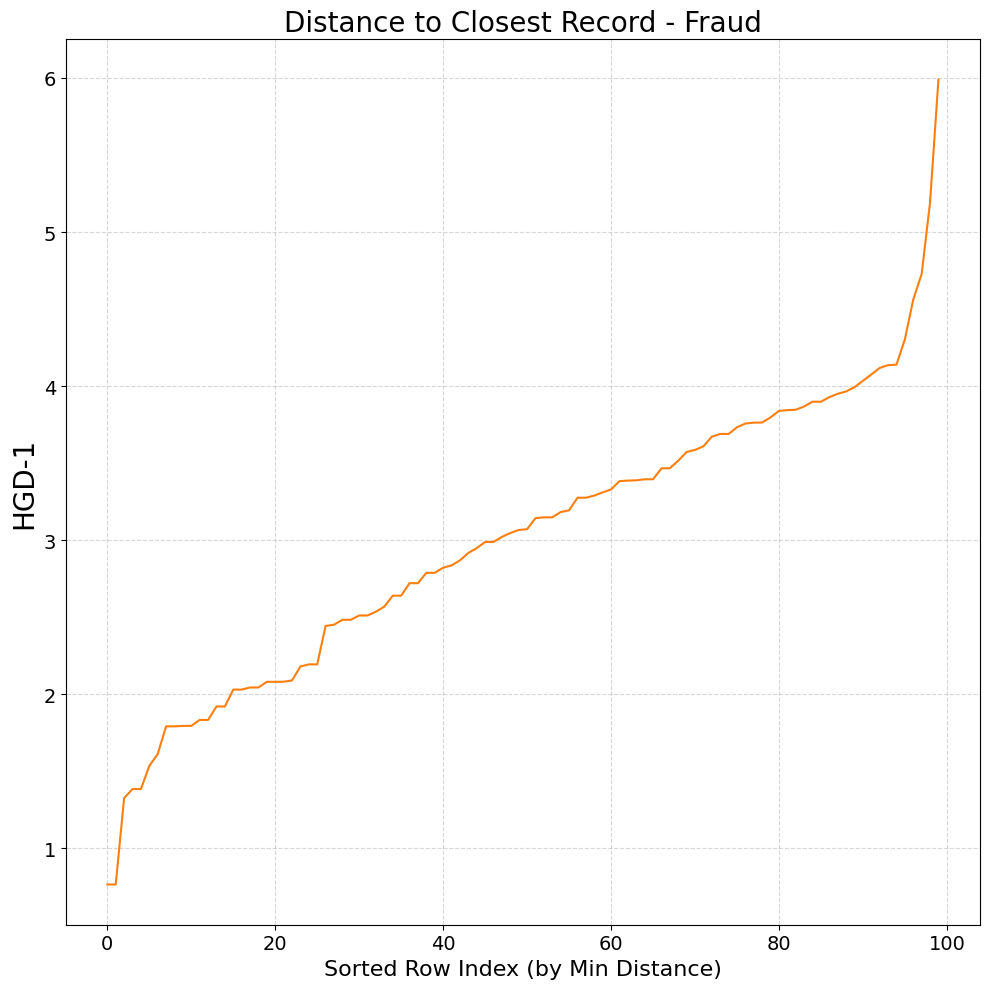

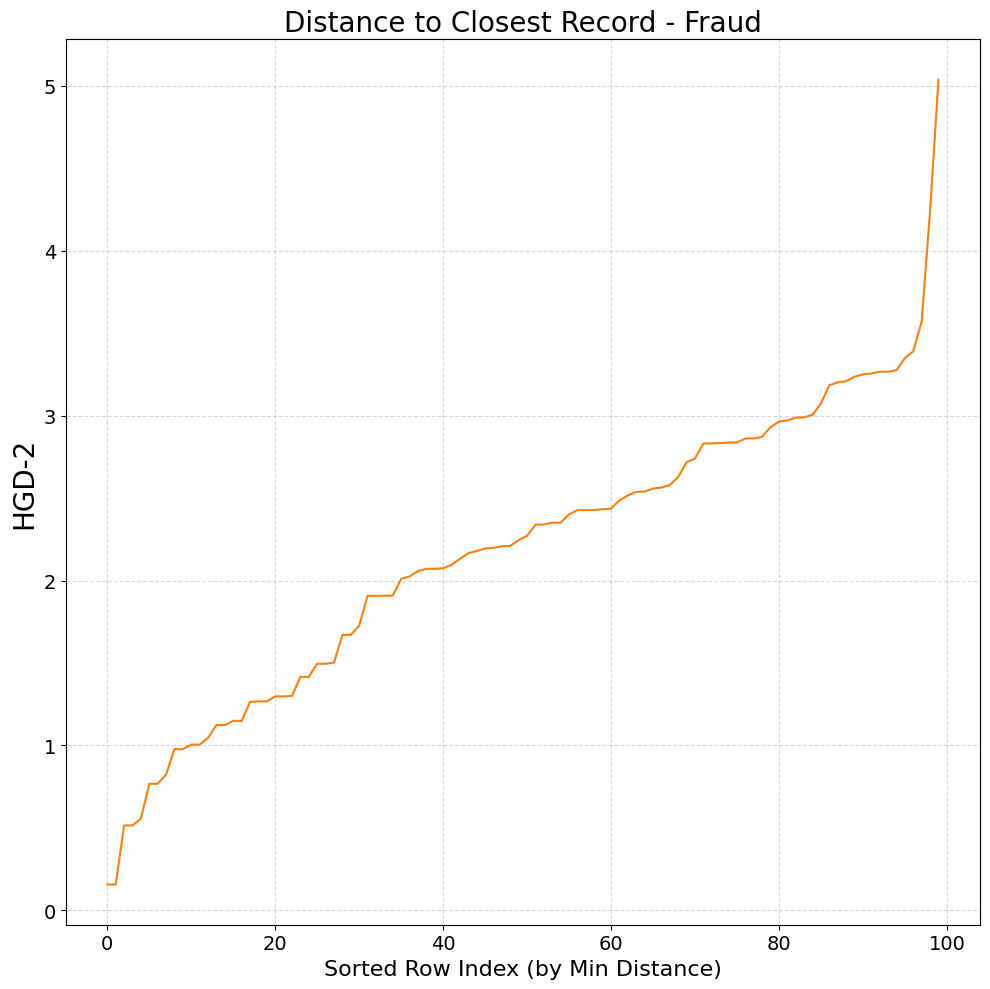

In [ ]:
datasets = [adult, king, fraud]
dataset_names = ["Adult","King","Fraud"]
is_hybrid = [False, False, True]
categorical_columns_adult = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
categorical_columns_king = ['bedrooms', "floors", 'waterfront', 'view', 'condition', 'grade','zipcode']
categorical_columns_fraud = ["fraud_bool","payment_type","employment_status","email_is_free","housing_status","device_os","phone_home_valid","has_other_cards","keep_alive_session"]
categorical_columns_list = [categorical_columns_adult, categorical_columns_king,categorical_columns_fraud]

samples = 1000

for i, df in enumerate(datasets):
    
    categorical_columns = categorical_columns_list[i]
    name = dataset_names[i]
    df_sample = df.sample(n=samples, random_state=22)
    print("Starting dataset: ", name)
    gower_matrix1, gower_matrix2, eucledian_matrix = compute_distance_and_plot(df_sample,categorical_columns=categorical_columns,dataset_name = name,hybrid=is_hybrid[i])

    gower1_min = gower_matrix1.min(axis=1)
    plot_distance(gower1_min, "HGD-1",dataset_name=name)
    
    gower2_min = gower_matrix2.min(axis=1)
    plot_distance(gower2_min, "HGD-2",dataset_name=name)

    if eucledian_matrix is not None:
        eucledian_matrix = euclidean_distance(df_sample, categorical_columns=categorical_columns)
        eucledian_matrix = pd.DataFrame(eucledian_matrix)
   

   

    

In [7]:
from ctab_xtra_dp import evaluation

In [ ]:
train, test = evaluation.split_data(adult, 0.2, "income",random_state=22)

fake = pd.read_csv('../data_generation/synthetic_data/adult_epochs_100_epsilon_None.csv')

n = 1000

train_sample = train.sample(n=n, random_state=22)
fake_sample = fake.sample(n=n, random_state=22)

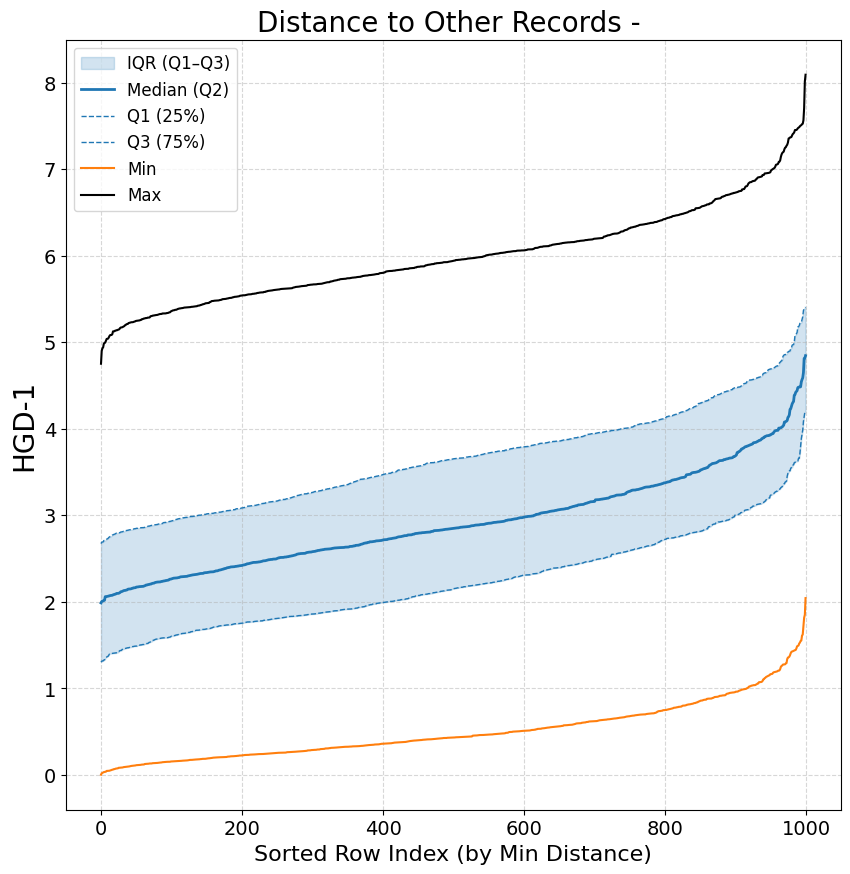

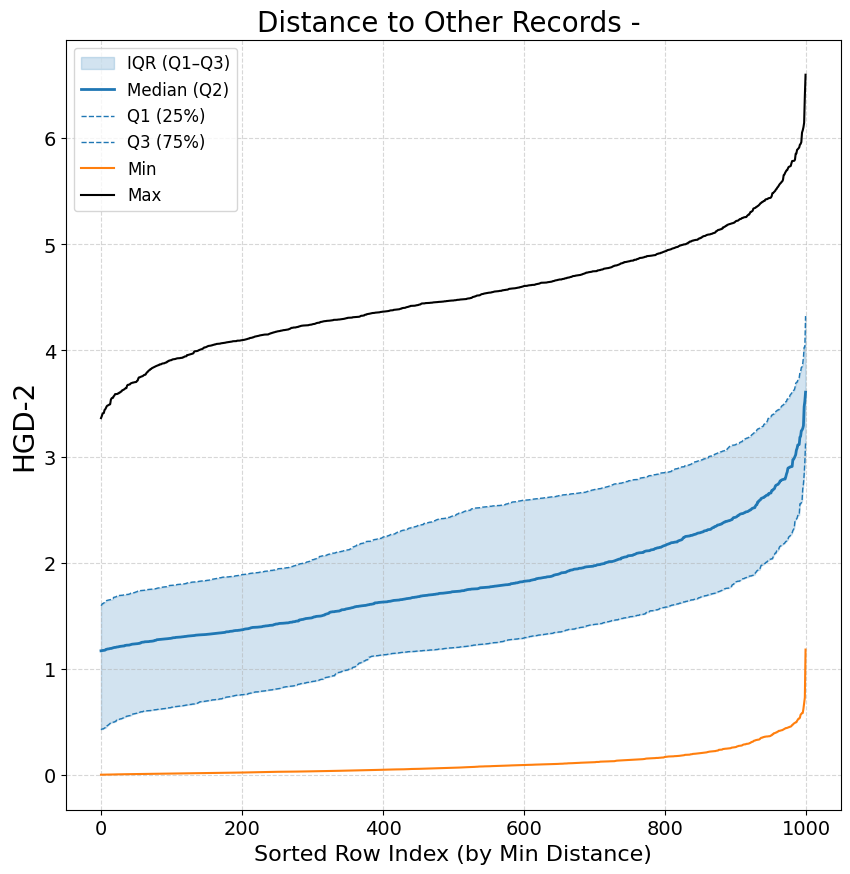

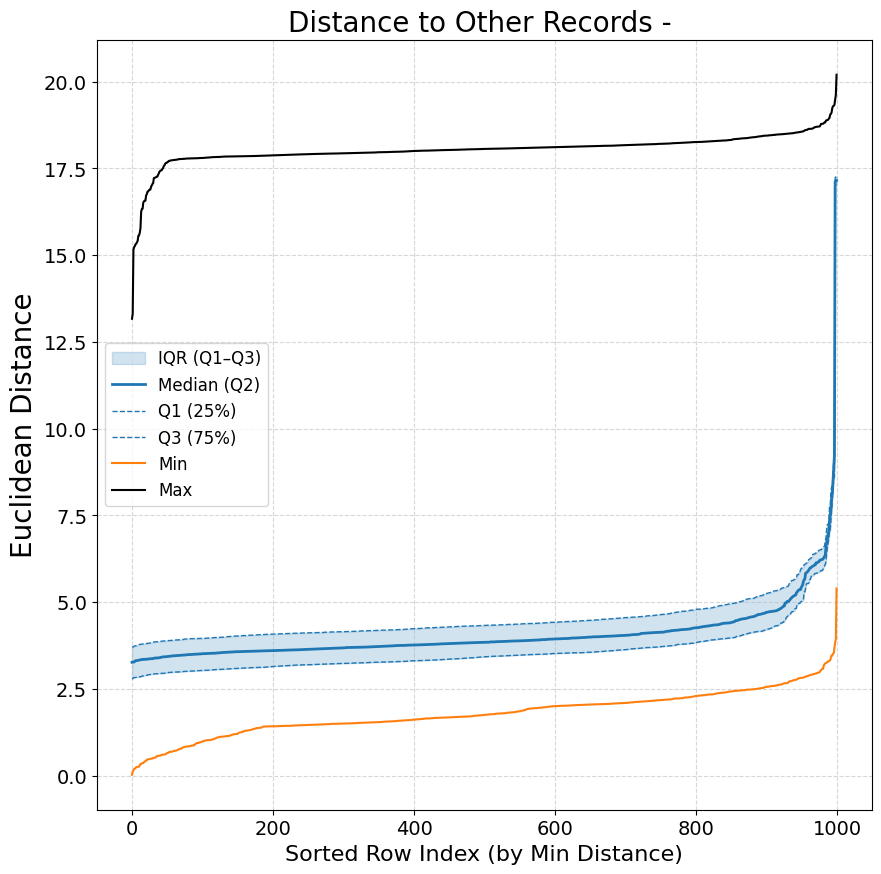

(array([[2.19304708, 3.33904343, 3.08642314, ..., 3.47831042, 4.69820778,
         1.89648513],
        [2.28420885, 4.38207731, 1.24453901, ..., 4.16836436, 4.21006515,
         2.02645115],
        [2.53189727, 3.92412732, 3.82527332, ..., 3.74327822, 4.96867703,
         2.84985585],
        ...,
        [4.55303903, 4.27146646, 4.49240531, ..., 3.58357511, 3.50947882,
         4.29528133],
        [1.82528167, 4.15171922, 2.98088521, ..., 3.7971612 , 3.35589333,
         1.65397356],
        [3.03600037, 5.36243791, 2.15653636, ..., 5.26140102, 4.82013316,
         2.86469226]]),
 array([[1.38128435, 2.23972259, 1.98493898, ..., 2.35733091, 3.29978939,
         0.95230743],
        [1.31754809, 3.29901698, 0.25864559, ..., 3.15253133, 3.17404906,
         1.22713131],
        [1.40452505, 2.41572552, 2.4798334 , ..., 2.24075193, 3.4238696 ,
         1.49834911],
        ...,
        [2.77329607, 2.39142181, 3.18313055, ..., 1.64892742, 2.51981029,
         2.76147557],
        [0.8

In [15]:
compute_distance_and_plot(train_sample,fake_sample,categorical_columns_adult)